In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib



In [2]:
data = pd.read_csv('data.csv')



In [3]:
data.head()


,Nama,Umur,Jenis_Kelamin,Berat_Badan,Tinggi_Badan,Penurunan_Berat_Badan,Frekuensi_Makan,Variasi_Makanan,Asupan_Protein,Mobilitas,Aktivitas_Sehari_hari,Kesehatan_Mulut,Penyakit_Kronis,Stres,Masalah_Kognitif
0,Junaidi,90,Laki-laki,70,166,0,Tiga kali atau lebih,"Makanan bervariasi (misalnya daging, sayuran, ...",Dua kali sehari atau lebih,Bergerak dengan bebas tanpa bantuan,Tidak ada kesulitan,Tidak ada masalah,Tidak,Tidak,Tidak ada masalah daya ingat
1,Tumini,82,Perempuan,56,145,0,Tiga kali atau lebih,"Makanan bervariasi (misalnya daging, sayuran, ...",Dua kali sehari atau lebih,Bergerak dengan bebas tanpa bantuan,Tidak ada kesulitan,Tidak ada masalah,Tidak,Tidak,Tidak ada masalah daya ingat
2,Yusraidi Sitompul,74,Laki-laki,52,146,0,Tiga kali atau lebih,"Makanan bervariasi (misalnya daging, sayuran, ...",Dua kali sehari atau lebih,Bergerak dengan bebas tanpa bantuan,Tidak ada kesulitan,Tidak ada masalah,Tidak,Tidak,Tidak ada masalah daya ingat
3,Yuni Astuti,60,Perempuan,48,146,0,Tiga kali atau lebih,"Makanan bervariasi (misalnya daging, sayuran, ...",Dua kali sehari atau lebih,Bergerak dengan bebas tanpa bantuan,Tidak ada kesulitan,Tidak ada masalah,Tidak,Tidak,Tidak ada masalah daya ingat
4,Yulwanda,69,Perempuan,51,170,0,Tiga kali atau lebih,"Makanan bervariasi (misalnya daging, sayuran, ...",Dua kali sehari atau lebih,Bergerak dengan bebas tanpa bantuan,Tidak ada kesulitan,Tidak ada masalah,Tidak,Tidak,Tidak ada masalah daya ingat


In [4]:

data.describe()


,Umur,Berat_Badan,Tinggi_Badan,Penurunan_Berat_Badan
count,517.000000,517.000000,517.000000,517.000000
mean,67.941973,58.034816,156.379110,2.203095
std,5.625292,10.782143,8.713762,1.636357
min,59.000000,34.000000,135.000000,0.000000
25%,64.000000,50.000000,149.000000,1.000000
50%,67.000000,58.000000,156.000000,2.000000
75%,71.000000,65.000000,163.000000,3.000000
max,93.000000,165.000000,179.000000,5.000000


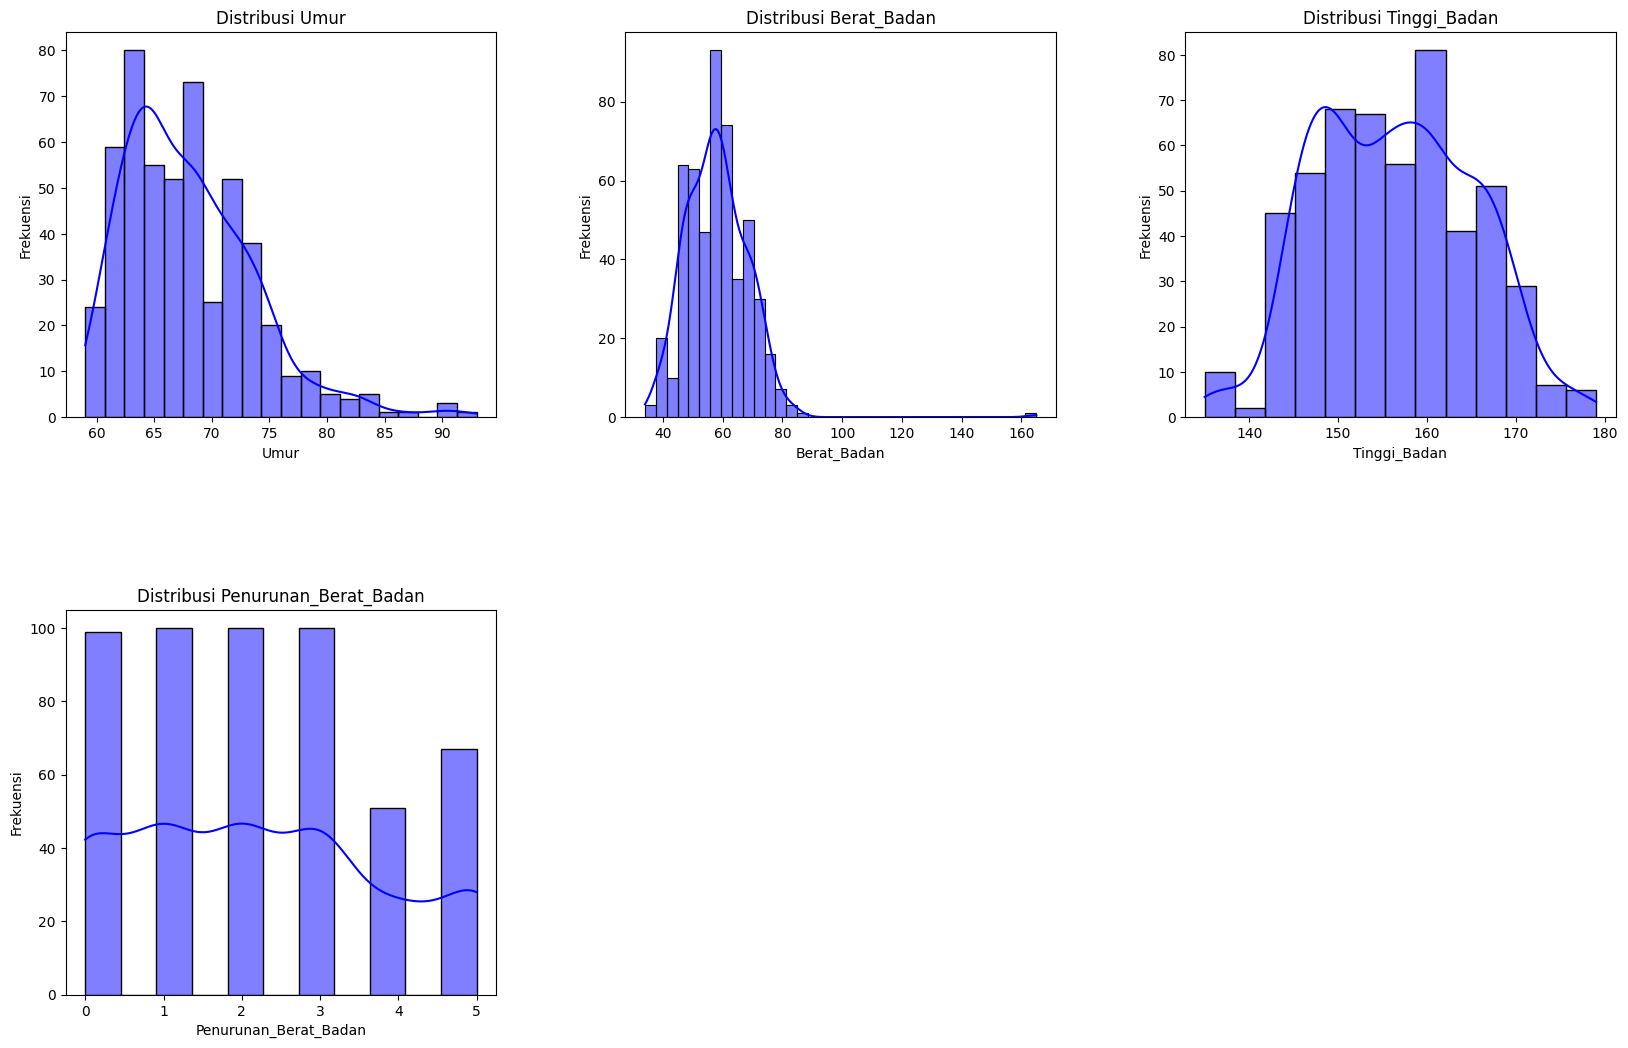

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))

filter_out = [
    'Jenis_Kelamin'
]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = data.select_dtypes(include=numerics)

num_df = num_df.drop(columns=[col for col in filter_out if col in num_df.columns], errors='ignore')
columns = num_df.columns.to_list()

num_columns = len(columns)
grid_size = int(num_columns ** 0.5) + 1

for i, column in enumerate(columns, start=1):
    plt.subplot(grid_size, grid_size, i)
    sns.histplot(num_df[column], kde=True, color='blue')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.ticklabel_format(style='plain', axis='x', scilimits=(0, 0))

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


In [6]:
# Konversi
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data['Jenis_Kelamin'] = data['Jenis_Kelamin'].map({'Perempuan': 1, 'Laki-laki': 0})
data['Penyakit_Kronis'] = data['Penyakit_Kronis'].map({
    'Ya': 1, 'Tidak': 0,
    'Ya (Hipertensi)':2,
    'Ya (Diabetes)':3,
    'Ya (Diabetes, Hipertensi)':4
})
data['Stres'] = data['Stres'].map({'Ya': 1, 'Tidak': 0})
data['Frekuensi_Makan'] = data['Frekuensi_Makan'].map({
    'Tiga kali atau lebih':3,
    'Dua kali': 2,
    'Satu kali atau kurang': 1
})

data['Variasi_Makanan'] = data['Variasi_Makanan'].map({
    'Makanan bervariasi (misalnya daging, sayuran, buah)': 3,
    'Makanan terbatas pada beberapa jenis saja': 2,
    'Makanan sangat terbatas atau monoton': 1
})

data['Asupan_Protein'] = data['Asupan_Protein'].map({
    'Dua kali sehari atau lebih': 3,
    'Sekali sehari': 2,
    'Kurang dari sekali sehari atau tidak pernah':1
})

data['Mobilitas']=data['Mobilitas'].map({
    'Bergerak dengan bebas tanpa bantuan':3,
    'Bergerak dengan bantuan':2,
    'Tidak dapat bergerak tanpa bantuan orang lain':1
})

data['Aktivitas_Sehari_hari']=data['Aktivitas_Sehari_hari'].map({
    'Tidak ada kesulitan':3,
    'Kesulitan ringan':2,
    'Kesulitan berat':1
})

data['Kesehatan_Mulut']=data['Kesehatan_Mulut'].map({
    'Tidak ada masalah':4,
    'Ada kesulitan ringan':3,
    'Kesulitan berat':2,
    'Kesulitan berat dalam mengunyah atau makan':1
})

data['Masalah_Kognitif']=data['Masalah_Kognitif'].map({
    'Tidak ada masalah daya ingat':3,
    'Ada sedikit masalah daya ingat':2,
    'Masalah daya ingat yang signifikan':1
})


In [7]:
print("\nData setelah konversi kategorikal:")
data.head()


Data setelah konversi kategorikal:


,Nama,Umur,Jenis_Kelamin,Berat_Badan,Tinggi_Badan,Penurunan_Berat_Badan,Frekuensi_Makan,Variasi_Makanan,Asupan_Protein,Mobilitas,Aktivitas_Sehari_hari,Kesehatan_Mulut,Penyakit_Kronis,Stres,Masalah_Kognitif
0,Junaidi,90,0,70,166,0,3,3,3,3,3,4,0,0,3
1,Tumini,82,1,56,145,0,3,3,3,3,3,4,0,0,3
2,Yusraidi Sitompul,74,0,52,146,0,3,3,3,3,3,4,0,0,3
3,Yuni Astuti,60,1,48,146,0,3,3,3,3,3,4,0,0,3
4,Yulwanda,69,1,51,170,0,3,3,3,3,3,4,0,0,3


In [8]:
data.fillna(data.mean(), inplace=True)

C:\Users\ASUS TUF F15\AppData\Local\Temp\ipykernel_11480\1474580016.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [9]:
from sklearn.preprocessing import RobustScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['Nama']))
joblib.dump(scaled_data, 'scaled_data.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [10]:
print("\nData setelah normalisasi :")
pd.DataFrame(scaled_data, columns=data.columns[1:]).head()


Data setelah normalisasi :


,Umur,Jenis_Kelamin,Berat_Badan,Tinggi_Badan,Penurunan_Berat_Badan,Frekuensi_Makan,Variasi_Makanan,Asupan_Protein,Mobilitas,Aktivitas_Sehari_hari,Kesehatan_Mulut,Penyakit_Kronis,Stres,Masalah_Kognitif
0,3.925021,-1.061872,1.110797,1.105172,-1.347645,1.284892,1.284892,1.284892,1.283868,1.283868,1.283868,-1.528229,-0.546804,1.283868
1,2.501495,0.941733,-0.188904,-1.307143,-1.347645,1.284892,1.284892,1.284892,1.283868,1.283868,1.283868,-1.528229,-0.546804,1.283868
2,1.077970,-1.061872,-0.560247,-1.192271,-1.347645,1.284892,1.284892,1.284892,1.283868,1.283868,1.283868,-1.528229,-0.546804,1.283868
3,-1.413200,0.941733,-0.931590,-1.192271,-1.347645,1.284892,1.284892,1.284892,1.283868,1.283868,1.283868,-1.528229,-0.546804,1.283868
4,0.188266,0.941733,-0.653083,1.564661,-1.347645,1.284892,1.284892,1.284892,1.283868,1.283868,1.283868,-1.528229,-0.546804,1.283868


In [11]:
data.describe()

,Umur,Jenis_Kelamin,Berat_Badan,Tinggi_Badan,Penurunan_Berat_Badan,Frekuensi_Makan,Variasi_Makanan,Asupan_Protein,Mobilitas,Aktivitas_Sehari_hari,Kesehatan_Mulut,Penyakit_Kronis,Stres,Masalah_Kognitif
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,67.941973,0.529981,58.034816,156.379110,2.203095,2.088975,2.088975,2.088975,2.069632,2.069632,3.069632,0.700193,0.230174,2.069632
std,5.625292,0.499584,10.782143,8.713762,1.636357,0.709715,0.709715,0.709715,0.725362,0.725362,0.725362,0.458617,0.421352,0.725362
min,59.000000,0.000000,34.000000,135.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000
25%,64.000000,0.000000,50.000000,149.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,2.000000
50%,67.000000,1.000000,58.000000,156.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,0.000000,2.000000
75%,71.000000,1.000000,65.000000,163.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,1.000000,0.000000,3.000000
max,93.000000,1.000000,165.000000,179.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,1.000000,1.000000,3.000000


In [12]:
import scipy.spatial.distance as distance
from sklearn.decomposition import PCA

# Distance function
def dist(vecA, vecB):
    return np.sqrt(np.power(vecA - vecB, 2).sum())

# CURE Cluster class
class CureCluster:
    def __init__(self, id__, center__):
        self.points = np.array(center__)
        self.repPoints = np.array(center__)
        self.center = np.array(center__)
        self.index = [id__]

    def __repr__(self):
        return "Cluster " + " Size: " + str(len(self.points))

    def computeCentroid(self, clust):
        totalPoints_1 = len(self.index)
        totalPoints_2 = len(clust.index)
        self.center = (self.center * totalPoints_1 + clust.center * totalPoints_2) / (totalPoints_1 + totalPoints_2)

    def generateRepPoints(self, numRepPoints, alpha):
        tempSet = None
        for i in range(1, numRepPoints + 1):
            maxDist = 0
            maxPoint = None
            for p in range(len(self.index)):
                if i == 1:
                    minDist = dist(self.points[p, :], self.center)
                else:
                    X = np.vstack([tempSet, self.points[p, :]])
                    tmpDist = distance.pdist(X)
                    minDist = tmpDist.min()
                if minDist >= maxDist:
                    maxDist = minDist
                    maxPoint = self.points[p, :]
            if tempSet is None:
                tempSet = maxPoint
            else:
                tempSet = np.vstack((tempSet, maxPoint))
        for j in range(len(tempSet)):
            if self.repPoints is None:
                self.repPoints = tempSet[j, :] + alpha * (self.center - tempSet[j, :])
            else:
                self.repPoints = np.vstack((self.repPoints, tempSet[j, :] + alpha * (self.center - tempSet[j, :])))

    def distRep(self, clust):
        distRep = float('inf')
        for repA in self.repPoints:
            if type(clust.repPoints[0]) != list:
                repB = clust.repPoints
                distTemp = dist(repA, repB)
                if distTemp < distRep:
                    distRep = distTemp
            else:
                for repB in clust.repPoints:
                    distTemp = dist(repA, repB)
                    if distTemp < distRep:
                        distRep = distTemp
        return distRep

    def mergeWithCluster(self, clust, numRepPoints, alpha):
        self.computeCentroid(clust)
        self.points = np.vstack((self.points, clust.points))
        self.index = np.append(self.index, clust.index)
        self.repPoints = None
        self.generateRepPoints(numRepPoints, alpha)

# Function to run CURE
def runCURE(data, numRepPoints, alpha, numDesCluster):
    Clusters = []
    numCluster = len(data)
    numPts = len(data)
    distCluster = np.ones([len(data), len(data)]) * float('inf')
    
    for idPoint in range(len(data)):
        newClust = CureCluster(idPoint, data[idPoint, :])
        Clusters.append(newClust)

    for row in range(numPts):
        for col in range(row):
            distCluster[row][col] = dist(Clusters[row].center, Clusters[col].center)
    
    while numCluster > numDesCluster:
        if np.mod(numCluster, 50) == 0:
            print('Cluster count:', numCluster)

        minIndex = np.where(distCluster == np.min(distCluster))
        minIndex1, minIndex2 = minIndex[0][0], minIndex[1][0]

        Clusters[minIndex1].mergeWithCluster(Clusters[minIndex2], numRepPoints, alpha)

        for i in range(0, minIndex1):
            distCluster[minIndex1, i] = Clusters[minIndex1].distRep(Clusters[i])
        for i in range(minIndex1 + 1, numCluster):
            distCluster[i, minIndex1] = Clusters[minIndex1].distRep(Clusters[i])

        distCluster = np.delete(distCluster, minIndex2, axis=0)
        distCluster = np.delete(distCluster, minIndex2, axis=1)
        del Clusters[minIndex2]
        numCluster -= 1

    print('Cluster count:', numCluster)
    
    Label = [0] * numPts
    for i in range(len(Clusters)):
        for j in range(len(Clusters[i].index)):
            Label[Clusters[i].index[j]] = i + 1

    return Clusters, Label  # Return both Clusters and Label


data_scaled = pd.DataFrame(scaled_data)

# Parameter CURE
numRepPoints = 5
alpha = 0.3
numDesCluster = 4

data_np = data_scaled.values
clusters, labels = runCURE(data_np, numRepPoints, alpha, numDesCluster)  # Get Clusters

pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_np)



Cluster count: 500
Cluster count: 450
Cluster count: 400
Cluster count: 350
Cluster count: 300
Cluster count: 250
Cluster count: 200
Cluster count: 150
Cluster count: 100
Cluster count: 50
Cluster count: 4


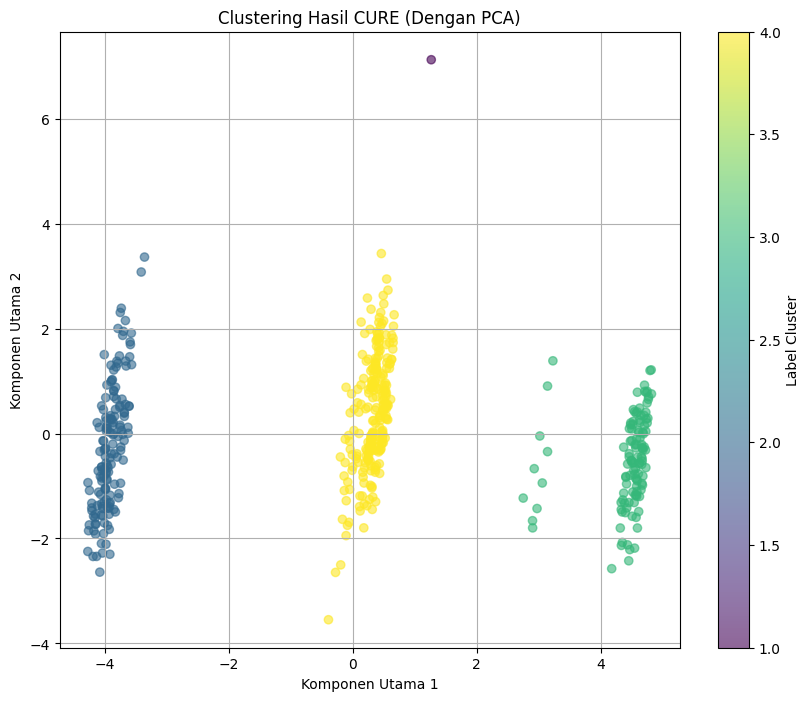

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('Clustering Hasil CURE (Dengan PCA)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Label Cluster')
plt.grid(True)
plt.show()

   Cluster  Size
0        1     1
1        2   155
2        3   119
3        4   242


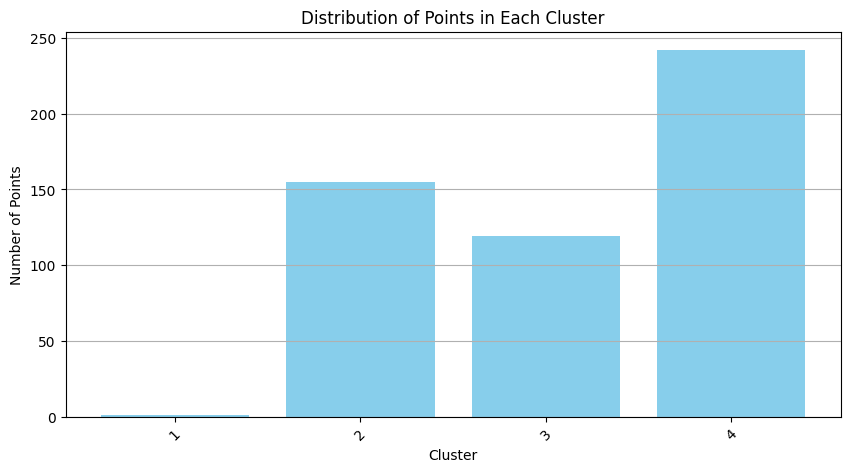

In [14]:
# Count the occurrences of each label
unique_labels, counts = np.unique(labels, return_counts=True)

# Create a DataFrame to display the cluster sizes
cluster_sizes = pd.DataFrame({'Cluster': unique_labels, 'Size': counts})

# Display the cluster sizes
print(cluster_sizes)

# Optional: Visualize the cluster sizes
plt.figure(figsize=(10, 5))
plt.bar(cluster_sizes['Cluster'].astype(str), cluster_sizes['Size'], color='skyblue')
plt.title('Distribution of Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [15]:
import numpy as np

def calculate_centroid(cluster_points):
    return np.mean(cluster_points, axis=0)

def calculate_dispersion(cluster_points, centroid):
    return np.mean(np.linalg.norm(cluster_points - centroid, axis=1))

def calculate_separation(centroid_i, centroid_j):
    return np.linalg.norm(centroid_i - centroid_j)

def davies_bouldin_index(data_np, labels):
    unique_labels = np.unique(labels) 
    centroids = [calculate_centroid(data_np[labels == label]) for label in unique_labels]
    dispersions = [calculate_dispersion(data_np[labels == label], centroid) for label, centroid in zip(unique_labels, centroids)]
    
    db_index = 0
    for i in range(len(centroids)):
        max_ratio = -1
        for j in range(len(centroids)):
            if i != j:
                separation = calculate_separation(centroids[i], centroids[j])
                ratio = (dispersions[i] + dispersions[j]) / separation
                max_ratio = max(max_ratio, ratio)
        db_index += max_ratio
    
    db_index /= len(centroids)
    return db_index, dispersions, centroids

db_index, dispersions, centroids = davies_bouldin_index(data_np, labels)

print(f'Davies-Bouldin Index: {db_index:.2f}')
print(f'Dispersions for each cluster: {dispersions}')
print(f'Centroids of each cluster: {centroids}')

Davies-Bouldin Index: 0.68
Dispersions for each cluster: [0.0, 1.9810670015191736, 1.8751490098308243, 1.8465723706314148]
Centroids of each cluster: [array([-0.52349676, -1.06187194,  9.93019531,  1.56466089,  0.48747123,
       -0.12548836, -0.12548836, -0.12548836, -0.0960899 , -0.0960899 ,
       -0.0960899 ,  0.6543522 , -0.54680433, -0.0960899 ]), array([ 0.33521068,  0.12736463, -0.31408229, -0.37186123, -1.12664173,
        1.28489168,  1.28489168,  1.28489168,  1.28386779,  1.28386779,
        1.28386779, -1.528229  , -0.54680433,  1.28386779]), array([-1.25746931e-01, -1.13983678e-03,  1.33290999e-01,  7.90454378e-02,
        1.43844181e+00, -1.41734907e+00, -1.41734907e+00, -1.41734907e+00,
       -1.47604758e+00, -1.47604758e+00, -1.47604758e+00,  6.54352195e-01,
        1.82880776e+00, -1.47604758e+00]), array([-0.15070361, -0.07662812,  0.09459062,  0.19284059,  0.01226207,
       -0.12548836, -0.12548836, -0.12548836, -0.0960899 , -0.0960899 ,
       -0.0960899 ,  0.6543

In [16]:
import pandas as pd

# Misalkan data asli Anda disimpan dalam DataFrame data_scaled
data_scaled['Cluster'] = labels  # Menambahkan kolom 'Cluster' berdasarkan hasil label dari runCURE

# Melihat jumlah data dalam setiap kluster
cluster_summary = data_scaled['Cluster'].value_counts().sort_index()
print("Cluster Summary:")
print(cluster_summary)

# Melihat data dalam masing-masing kluster
for cluster_num in range(1, numDesCluster + 1):
    print(f"\nData in Cluster {cluster_num}:")
    cluster_data = data_scaled[data_scaled['Cluster'] == cluster_num]
    print(cluster_data)

Cluster Summary:
1      1
2    155
3    119
4    242
Name: Cluster, dtype: int64

Data in Cluster 1:
            0         1         2         3         4         5         6  \
371 -0.523497 -1.061872  9.930195  1.564661  0.487471 -0.125488 -0.125488   

            7        8        9       10        11        12       13  Cluster  
371 -0.125488 -0.09609 -0.09609 -0.09609  0.654352 -0.546804 -0.09609        1  

Data in Cluster 2:
            0         1         2         3         4         5         6  \
0    3.925021 -1.061872  1.110797  1.105172 -1.347645  1.284892  1.284892   
1    2.501495  0.941733 -0.188904 -1.307143 -1.347645  1.284892  1.284892   
2    1.077970 -1.061872 -0.560247 -1.192271 -1.347645  1.284892  1.284892   
3   -1.413200  0.941733 -0.931590 -1.192271 -1.347645  1.284892  1.284892   
4    0.188266  0.941733 -0.653083  1.564661 -1.347645  1.284892  1.284892   
..        ...       ...       ...       ...       ...       ...       ...   
287  0.188266 -1.061872

In [17]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_np)

db_index = davies_bouldin_score(data_scaled, labels)
print(f'Davies-Bouldin Index: {db_index:.2f}')

sil_score = silhouette_score(data_scaled, labels)
print(f'Silhouette Score: {sil_score:.2f}')

Davies-Bouldin Index: 0.68
Silhouette Score: 0.50


In [18]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# silhouette_scores = []

# range_n_clusters = range(2, 11)  # Menguji dari 2 hingga 10 cluster

# for n_clusters in range_n_clusters:
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     kmeans.fit(X_scaled)
    
#     score = silhouette_score(X_scaled, kmeans.labels_)
#     silhouette_scores.append(score)

# plt.plot(range_n_clusters, silhouette_scores, marker='o')
# plt.title('Silhouette Analysis untuk Menentukan Jumlah Cluster Optimal')
# plt.xlabel('Jumlah Cluster')
# plt.ylabel('Silhouette Score')
# plt.show()

# optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
# print(f'Jumlah cluster optimal berdasarkan silhouette score: {optimal_clusters}')


In [19]:
# from sklearn.metrics import silhouette_score

# # Misalnya, `X` adalah data Anda dalam bentuk array atau DataFrame
# # dan `cluster_labels` adalah hasil label dari algoritma CURE yang Anda gunakan
# # (saya asumsikan variabel `X` dan `cluster_labels` sudah tersedia)

# # Evaluasi kualitas cluster menggunakan Silhouette Score
# silhouette_avg = silhouette_score(X, cluster_labels)
# print(f"Silhouette Score untuk hasil clustering adalah: {silhouette_avg:.4f}")


In [20]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Fungsi untuk menghitung SSE
# def calculate_sse(data, clusters, labels):
#     sse = 0
#     for cluster in clusters:
#         points = data[np.isin(labels, cluster.index)]
#         centroid = cluster.center
#         sse += np.sum((points - centroid) ** 2)
#     return sse

# # Mendapatkan SSE untuk berbagai jumlah kluster dan memplotnya
# sse_values = []
# num_clusters_range = range(1, 11)  # Range jumlah cluster yang ingin diuji

# for num_clusters in num_clusters_range:
#     clusters, labels = runCURE(data_np, numRepPoints, alpha, num_clusters)
#     sse = calculate_sse(data_np, clusters, labels)
#     sse_values.append(sse)

# # Plotting SSE untuk setiap jumlah cluster
# plt.figure(figsize=(10, 6))
# plt.plot(num_clusters_range, sse_values, marker='o')
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.title("Elbow Method for Optimal Number of Clusters")
# plt.show()


In [21]:
# import joblib

# # Save the representative points of the clusters
# def save_model(clusters, filename='cure_model.pkl'):
#     rep_points = []
#     for cluster in clusters:
#         rep_points.append(cluster.repPoints)
#     joblib.dump(rep_points, filename)

# # Call this function after running CURE
# save_model(clusters)


In [22]:
# # Load the representative points of the clusters
# def load_model(filename='cure_model.pkl'):
#     return joblib.load(filename)

In [23]:
# # Load the fitted scaler
# def load_scaler(filename='scaler.pkl'):
#     return joblib.load(filename)